In [ ]:
import pandas as pd
df = pd.read_csv('/content/AUD_Project_Data.csv')
print(df.head())
print(df.columns)


   stars_x  useful                                               text  \
0        5       5  Second stop for Center City Restaurant Week:  ...   
1        5       3  I moved from Chicago to Philadelphia over a ye...   
2        5       2  After trying twice unsuccessfully to get there...   
3        5       5  This place is game changer for the neighborhoo...   
4        5       9  Went here for dinner on opening day and was SO...   

                         name  postal_code  review_count  \
0                         R2L        19102           787   
1                     Kanella        19107           579   
2       Octopus Falafel Truck        19103           420   
3          Los Caballos Locos        19148            31   
4  iPho Vietnamese Restaurant        19130           151   

                                          categories  year  month Day_Of_Week  
0  American (New), Lounges, Nightlife, Cocktail B...  2015      9    Thursday  
1  Mediterranean, Food, Greek, Restauran

In [ ]:
print(df.isnull().sum())
df.fillna({'stars_x': df['stars_x'].median(),
           'review_count': df['review_count'].median(),
           'categories': 'Unknown'}, inplace=True)


stars_x         0
useful          0
text            0
name            0
postal_code     0
review_count    0
categories      0
year            0
month           0
Day_Of_Week     0
dtype: int64


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/AUD_Project_Data.csv')


print(df.head())


print(df.columns)

   stars_x  useful                                               text  \
0        5       5  Second stop for Center City Restaurant Week:  ...   
1        5       3  I moved from Chicago to Philadelphia over a ye...   
2        5       2  After trying twice unsuccessfully to get there...   
3        5       5  This place is game changer for the neighborhoo...   
4        5       9  Went here for dinner on opening day and was SO...   

                         name  postal_code  review_count  \
0                         R2L        19102           787   
1                     Kanella        19107           579   
2       Octopus Falafel Truck        19103           420   
3          Los Caballos Locos        19148            31   
4  iPho Vietnamese Restaurant        19130           151   

                                          categories  year  month Day_Of_Week  
0  American (New), Lounges, Nightlife, Cocktail B...  2015      9    Thursday  
1  Mediterranean, Food, Greek, Restauran

In [ ]:

print(df.isnull().sum())

df.fillna({'stars_x': df['stars_x'].median(),
           'review_count': df['review_count'].median(),
           'categories': 'Unknown'}, inplace=True)


stars_x         0
useful          0
text            0
name            0
postal_code     0
review_count    0
categories      0
year            0
month           0
Day_Of_Week     0
dtype: int64


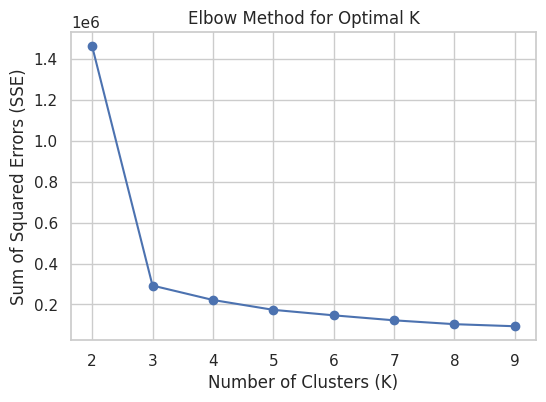

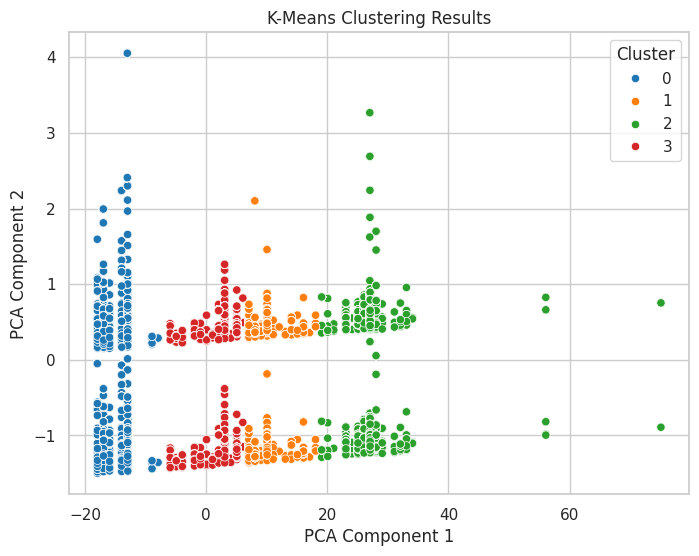

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


features = ['review_count', 'stars_x', 'categories', 'postal_code']
df_cluster = df[features].copy()


scaler = StandardScaler()
df_cluster[['review_count', 'stars_x']] = scaler.fit_transform(df_cluster[['review_count', 'stars_x']])


vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = vectorizer.fit_transform(df_cluster['categories'].fillna(''))


tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_cluster = df_cluster.drop(columns=['categories']).reset_index(drop=True)
df_cluster = pd.concat([df_cluster, tfidf_df], axis=1)

sse = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(6,4))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster)

pca = PCA(n_components=2)
df_cluster['pca_x'], df_cluster['pca_y'] = pca.fit_transform(df_cluster.iloc[:, :-1]).T

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca_x', y='pca_y', hue=df_cluster['cluster'], palette='tab10', data=df_cluster)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results')
plt.legend(title="Cluster")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


reviews = df['text'].fillna('')


vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(reviews)


feature_names = vectorizer.get_feature_names_out()
print("Top words:", feature_names[:20])


Top words: ['amazing' 'area' 'awesome' 'bar' 'beef' 'beer' 'best' 'better' 'bit'
 'bread' 'came' 'cheese' 'chicken' 'city' 'coffee' 'come' 'day'
 'definitely' 'delicious' 'dessert']


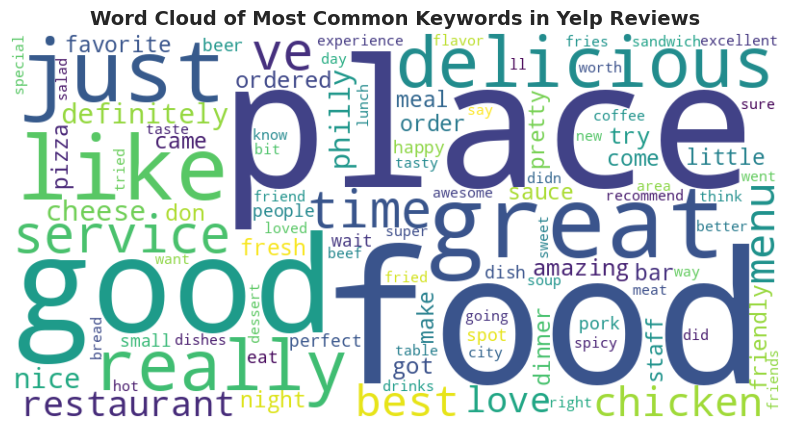

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

tfidf_scores = dict(zip(feature_names, tfidf_matrix.sum(axis=0).A1))


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tfidf_scores)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Keywords in Yelp Reviews", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()


df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


print(df[['text', 'sentiment']].head())


df['cluster'] = kmeans.fit_predict(df_cluster.iloc[:, :-1])

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])



                                                text  sentiment
0  Second stop for Center City Restaurant Week:  ...     0.9890
1  I moved from Chicago to Philadelphia over a ye...     0.9986
2  After trying twice unsuccessfully to get there...     0.9410
3  This place is game changer for the neighborhoo...     0.8347
4  Went here for dinner on opening day and was SO...     0.9751


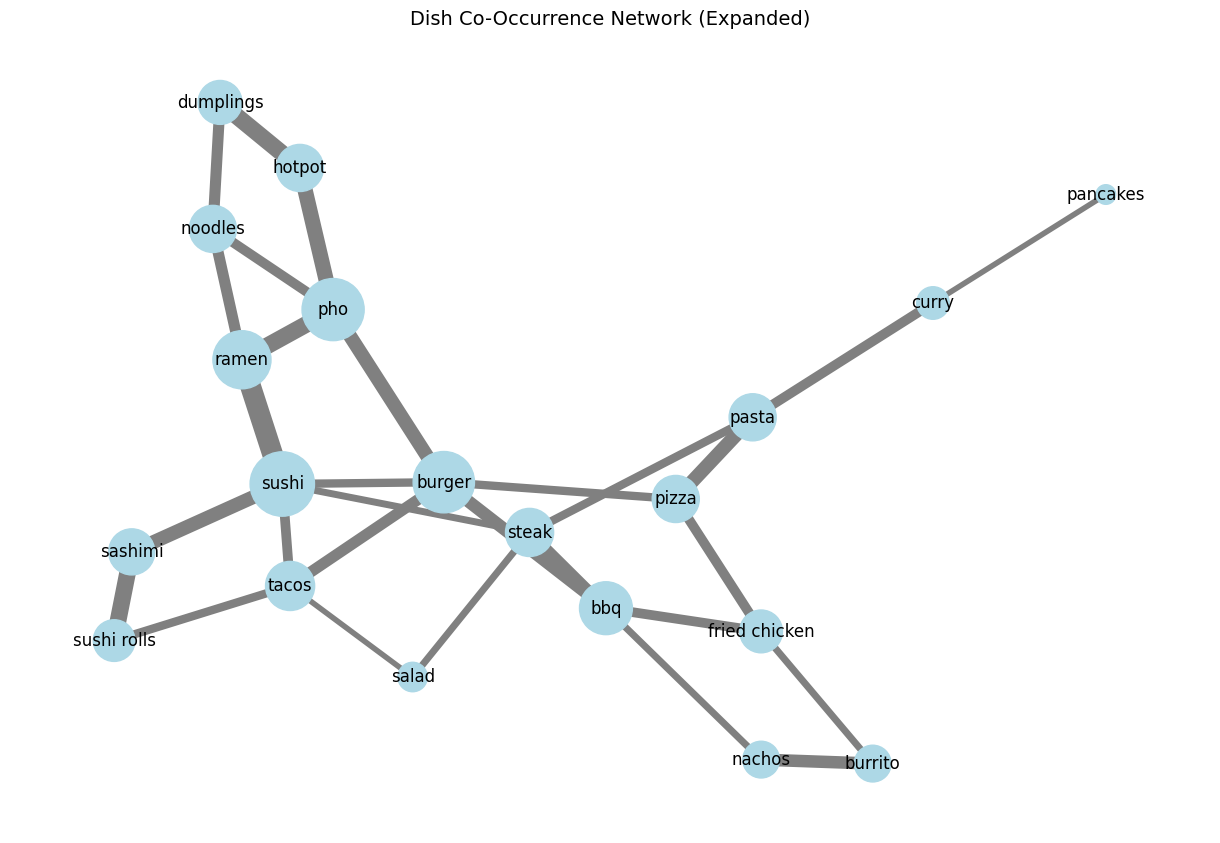

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


dishes = [
    "burger", "pho", "sushi", "tacos", "ramen",
    "pizza", "pasta", "steak", "noodles", "salad",
    "bbq", "dumplings", "hotpot", "sashimi", "fried chicken",
    "burrito", "curry", "pancakes", "sushi rolls", "nachos"
]

edges = [
    ("burger", "pho", 10), ("burger", "tacos", 8), ("burger", "sushi", 6),
    ("tacos", "sushi", 7), ("pho", "ramen", 12), ("ramen", "sushi", 15),
    ("pizza", "pasta", 10), ("steak", "salad", 5), ("noodles", "ramen", 8),
    ("burger", "pizza", 6), ("pho", "noodles", 7), ("sushi", "steak", 5),
    ("tacos", "salad", 4), ("pasta", "steak", 6),
    ("bbq", "burger", 9), ("bbq", "steak", 8), ("bbq", "fried chicken", 7),
    ("dumplings", "hotpot", 12), ("dumplings", "noodles", 8),
    ("hotpot", "pho", 11), ("sashimi", "sushi", 10), ("sashimi", "sushi rolls", 12),
    ("fried chicken", "burrito", 5), ("burrito", "nachos", 9),
    ("curry", "pasta", 7), ("curry", "pancakes", 4), ("sushi rolls", "tacos", 6),
    ("nachos", "bbq", 5), ("fried chicken", "pizza", 7)
]


G = nx.Graph()
G.add_nodes_from(dishes)


for dish1, dish2, weight in edges:
    G.add_edge(dish1.lower(), dish2.lower(), weight=weight)


edge_widths = [G[u][v]['weight'] for u,v in G.edges()]

node_size = {dish.lower(): sum([w for (d1, d2, w) in edges if d1 == dish or d2 == dish]) * 50 for dish in dishes}

pos = nx.spring_layout(G, seed=42)


plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True,
        node_size=[node_size[d] for d in G.nodes()],
        node_color="lightblue", edge_color="gray",
        width=edge_widths, font_size=12)


plt.title("Dish Co-Occurrence Network (Expanded)", fontsize=14)
plt.show()



<ipython-input-47-66b9026a0013>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='sentiment', data=df, palette="coolwarm")


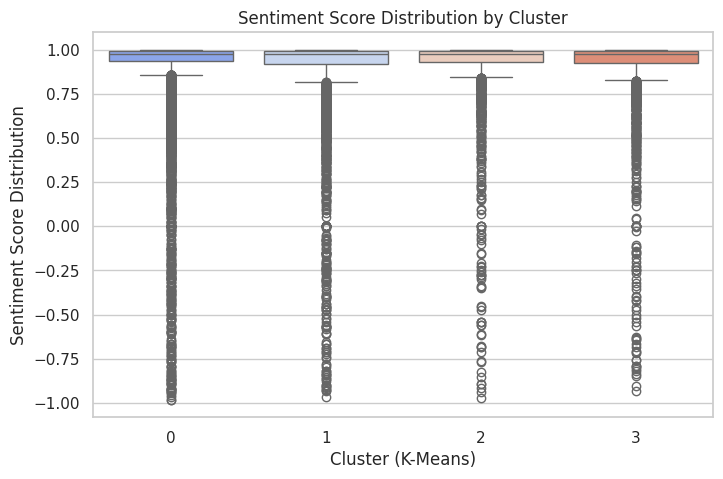

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='sentiment', data=df, palette="coolwarm")
plt.xlabel("Cluster (K-Means)")
plt.ylabel("Sentiment Score Distribution")
plt.title("Sentiment Score Distribution by Cluster")
plt.show()




In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)


for index, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic {index + 1}: {', '.join(top_words)}")


Topic 1: food, beef, fried, cheese, spicy, sauce, good, sandwich, pork, chicken
Topic 2: time, good, philly, don, just, best, ve, place, food, like
Topic 3: dish, meal, great, food, dessert, delicious, ordered, good, restaurant, pizza
Topic 4: spot, delicious, good, love, staff, friendly, food, great, place, coffee
Topic 5: service, night, happy, drinks, place, good, food, great, beer, bar


In [ ]:
print(df.columns)


Index(['stars_x', 'useful', 'text', 'name', 'postal_code', 'review_count',
       'categories', 'year', 'month', 'Day_Of_Week', 'sentiment'],
      dtype='object')


In [ ]:
import numpy as np


lda_topics = lda.transform(tfidf_matrix)


df['topic'] = np.argmax(lda_topics, axis=1)


if 'year' not in df.columns:
    df['year'] = df['date'].str[:4]


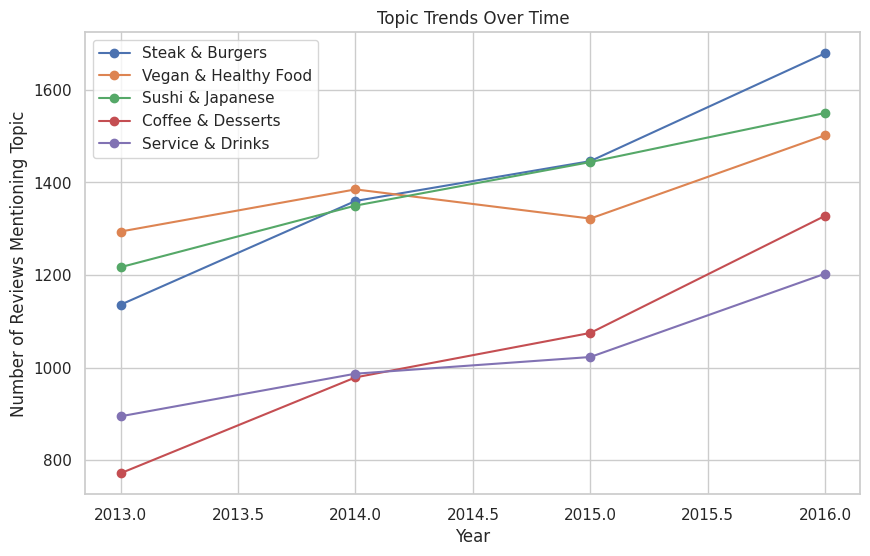

In [ ]:

topic_labels = {
    0: "Steak & Burgers",
    1: "Vegan & Healthy Food",
    2: "Sushi & Japanese",
    3: "Coffee & Desserts",
    4: "Service & Drinks"
}


topic_trends.rename(columns=topic_labels, inplace=True)


plt.figure(figsize=(10, 6))
for topic in topic_trends.columns:
    plt.plot(topic_trends.index, topic_trends[topic], marker='o', label=topic)

plt.xlabel("Year")
plt.ylabel("Number of Reviews Mentioning Topic")
plt.title("Topic Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()
